# SQL employee analysis

In [161]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sqlalchemy import create_engine 
# Postgres username, password, and database name 
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'postgres' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = input('Postgres Password: ') ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD 
POSTGRES_DBNAME = 'employee_analysis' ## CHANGE THIS TO YOUR DATABASE NAME 
# A long string that contains the necessary Postgres login information 
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username = POSTGRES_USERNAME, 
                        password = POSTGRES_PASSWORD, 
                        ipaddress= POSTGRES_ADDRESS, 
                        port     = POSTGRES_PORT,
                        dbname   = POSTGRES_DBNAME))

In [46]:
## 'postgresql://localhost:5432/employee_analysis'
engine = create_engine(postgres_str)
connection = engine.connect()

## 1. Average Salary for All Entry Titles

In [127]:
entry_salary_df = pd.read_sql_query(
                    ''' 
                    SELECT title.emp_no, title.title AS entry_title, salaries.salary as entry_salary
                    FROM 
                        (title INNER JOIN salaries ON salaries.emp_no = title.emp_no)
                    WHERE salaries.from_date = title.from_date
                    ORDER BY emp_no
                    ''',connection)
entry_salary_df['entry_salary'] = entry_salary_df['entry_salary'].apply(lambda x: x[1:].replace(",",'')).astype(float)
entry_salary_df.head()

,emp_no,entry_title,entry_salary
0,10001,Senior Engineer,60117.0
1,10002,Staff,65828.0
2,10003,Senior Engineer,40006.0
3,10004,Engineer,40054.0
4,10005,Staff,78228.0


In [141]:
average_salary = entry_salary_df.groupby('entry_title').mean()['entry_salary'].round(2)
average_salary

entry_title
Assistant Engineer    48493.20
Engineer              48547.81
Manager               57290.78
Senior Engineer       48425.34
Senior Staff          58547.69
Staff                 58465.50
Technique Leader      48580.98
Name: entry_salary, dtype: float64

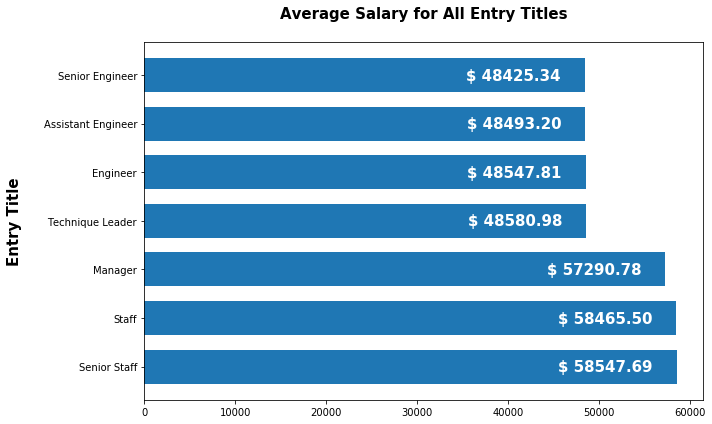

In [222]:
average_salary = average_salary.sort_values(ascending = False)


x_array = np.arange(len(average_salary))

plt.figure(figsize = (10,6))
plt.barh(x_array, average_salary, 0.7)
plt.yticks(x_array, average_salary.index)
for x in x_array:
    plt.text(average_salary[x] - 1.3e4, x-0.1, "$ {:.2f}".format(average_salary[x]), 
             color = 'w', weight = 'bold', fontsize = 15)

plt.ylabel('Entry Title\n', weight = 'bold', fontsize = 15)
plt.title('Average Salary for All Entry Titles\n', weight = 'bold', fontsize = 15)
plt.tight_layout()
plt.savefig('RESULT/average_salary_entry_titles.png')
plt.show()